# TP 3 SVM
On se propose de faire de la modélisation par SVM sur des problématiques de discrimination, en utilisant la bibliothèque scikit-learn.

On veut : 
- Traiter un problème de discrimination linéairement séparable
- Traiter un problème non linéairement séparable (SVM à noyaux)
- Traiter le problème de la discrimination de chiffres manuscrits

## Problème linéairement séparable

In [145]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

In [146]:
def genere_ex_1(n1=100, n2=50, mu1=[0,3], mu2=[3,0], sd1=0.15, sd2=0.2):
    """ Génération de point
    """
    X = np.concatenate((np.random.multivariate_normal(mu1, np.diagflat(sd1*np.ones(2)), n1),
                        np.random.multivariate_normal(mu2, np.diagflat(sd2*np.ones(2)),n2)))

    Y = np.concatenate((np.ones((n1,1)), -1*np.ones((n2,1))))[:,0]
    return X,Y

In [147]:
def plot_data_hyperplan(X, Y, classifier, name):
    """ Affichage du classifieur 
    """
    w = classifier.coef_[0]
    b = classifier.intercept_[0]
    a = -w[0] / w[1]
    xx = np.linspace(min(X[:,0]), max(X[:,0]))
    yy = a * xx - b/w[1]

    color = ['red' if c >= 0 else 'blue' for c in Y]
    plt.scatter(X[:,0], X[:,1], color=color)

    plt.plot(xx,yy, color='black')
    plt.plot(xx, yy+1/w[1], color='green')
    plt.plot(xx, yy-1/w[1], color='green')
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title("Classe 1 (red), Classe -1 (blue)")
    plt.show()

In [148]:
def main(X,Y):
    classifier = SVC(kernel='linear', probability=True)
    classifier = classifier.fit(X, Y)

    plot_data_hyperplan(X, Y, classifier, 'Graph_SVM_linear')

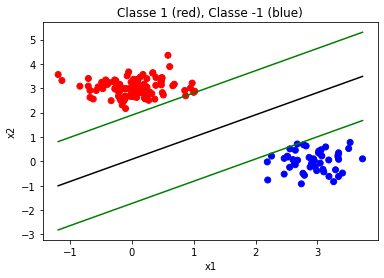

In [149]:
X, Y = genere_ex_1() 
main(X, Y)


## Problème non linéairement séparable


In [150]:
from sklearn.model_selection import GridSearchCV

In [151]:
def genere_ex_2(n=300, mu=[0,0], std=0.25, delta=0.2):
    """ Génération de données de nuage gaussien centré en 0 et traversé par une fonction polynomiale de degré 3
    """
    X = np.random.multivariate_normal(mu, np.diagflat(std*np.ones(2)), n)
    Y = np.zeros((X.shape[0]))

    for i in range(X.shape[0]):
        x = X[i,0]
        y = X[i,1]
        if y < x*(x-1)*(x+1):
            Y[i] = -1
            X[i,1] = X[i,1] - delta
        else:
            Y[i] = 1
            X[i,1] = X[i,1] + delta
    return X,Y

In [152]:
def plot(X,Y,classifier, nameFig):
    """ Visualisation
    """
    minx1 = min(X[:,0])
    maxx1 = max(X[:,0])
    minx2 = min(X[:,1])
    maxx2 = max(X[:,1])

    xx = np.linspace(minx1, maxx1, 100)
    yy = np.linspace(minx2, maxx2, 100).T
    xx, yy = np.meshgrid(xx,yy)
    Xfull = np.c_[xx.ravel(), yy.ravel()]

    probas = classifier.predict_proba(Xfull)
    Z = classifier.decision_function(Xfull)

    k = 1
    plt.title("Class %d" %k)
    imshow_handle = plt.imshow(probas[:, k].reshape((100,100)), extent=(minx1, maxx1, minx2, maxx2), origin='lower')
    
    classPos = Y>=0
    classNeg = Y<0

    plt.contour(xx, yy, Z.reshape((100,100)), [-1,0,1], colors=['blue', 'black', 'red'])
    plt.scatter(X[classPos, 0], X[classPos, 1], marker='o', c='r', edgecolors='k')
    plt.scatter(X[classNeg, 0], X[classNeg, 1], marker='o', c='b', edgecolors='k')

    ax = plt.axes([0.8, 0.15, 0.05, 0.7])

    plt.title('Probability')
    plt.colorbar(imshow_handle, cax=ax, orientation='vertical')
    
    plt.savefig(nameFig+'.jpg', dpi=300)
    plt.show()
    plt.close()

In [153]:
def main(X,Y,nameFig = 'GridSearchCV'):
    """ Création du modèle avec la recherche du meilleur paramétrage de GridSearchCV 
    """
    parameters = {'kernel':('poly', 'poly'), 'C':[0.1,0.5, 1, 10], 'degree':[3,5], 'coef0':[0, 0.1, 0.5, 1, 10]}
    svc = SVC(probability=True)
    classifier = GridSearchCV(svc, parameters)
    classifier = classifier.fit(X,Y)
    print(classifier.best_params_)

    plot(X,Y, classifier=classifier, nameFig=nameFig)

{'C': 1, 'coef0': 0.5, 'degree': 3, 'kernel': 'poly'}


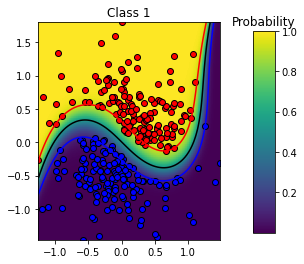

In [154]:
X,Y = genere_ex_2()
main(X,Y)